In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [16]:
# Load the preprocessed dataset
df = pd.read_csv("medical_insurance_preprocessed.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=["insurance_cost"])
y = df["insurance_cost"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Size: {X_train.shape}")
print(f"Testing Data Size: {X_test.shape}")


Training Data Size: (4000, 26)
Testing Data Size: (1000, 26)


In [17]:
# ...existing code...

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R² Score: {r2_score(y_test, y_pred_lr)}")

Linear Regression RMSE: 0.29501538012587336
Linear Regression R² Score: 0.9999999997571102


In [18]:
# ...existing code...

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf)}")

Random Forest RMSE: 5300.823627897141
Random Forest R² Score: 0.9215836209567939


In [19]:
print(X_train.corrwith(y_train).sort_values(ascending=False))


annual_medical_expenses      0.783683
hospital_visits_per_year     0.342695
medical_history_score        0.303786
bmi                          0.201145
smoker                       0.194485
has_cancer_history           0.183192
num_dependents               0.171451
has_heart_disease            0.121611
age                          0.110280
has_diabetes                 0.087486
has_hypertension             0.052587
credit_score                 0.042968
alcohol_consumption          0.023429
policy_type                  0.022855
savings_amount               0.020376
policy_renewal_status        0.017519
gender                       0.016266
exercise_frequency           0.010022
diet_type                    0.006538
previous_insurance_claims   -0.001376
employment_type             -0.008336
medication_costs_per_year   -0.009191
region                      -0.009873
stress_level                -0.012974
id                          -0.016797
annual_income               -0.065159
dtype: float

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Remove highly correlated feature
X_train_filtered = X_train.drop(columns=["annual_medical_expenses"])
X_test_filtered = X_test.drop(columns=["annual_medical_expenses"])

# Train Linear Regression again
lr_model.fit(X_train_filtered, y_train)
y_pred_lr = lr_model.predict(X_test_filtered)

print(f"Updated Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"Updated Linear Regression R² Score: {r2_score(y_test, y_pred_lr)}")

# Train Random Forest again
rf_model.fit(X_train_filtered, y_train)
y_pred_rf = rf_model.predict(X_test_filtered)

print(f"Updated Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"Updated Random Forest R² Score: {r2_score(y_test, y_pred_rf)}")


Updated Linear Regression RMSE: 14279.151173349399
Updated Linear Regression R² Score: 0.4309835017006043
Updated Random Forest RMSE: 15265.444944832825
Updated Random Forest R² Score: 0.3496621809093311


In [21]:
import pandas as pd
import numpy as np

# Load preprocessed dataset
df = pd.read_csv("medical_insurance_preprocessed.csv")

# 1️⃣ Create a "Health Risk Score" combining chronic diseases and medical history
df["health_risk_score"] = (
    df["medical_history_score"] * 5 +
    df["has_diabetes"] * 2 +
    df["has_hypertension"] * 2 +
    df["has_heart_disease"] * 3 +
    df["has_cancer_history"] * 5 +
    df["smoker"] * 3
)

# 2️⃣ Generate an "Expense Ratio" = Annual medical expenses / Annual income
df["expense_ratio"] = df["annual_medical_expenses"] / (df["annual_income"] + 1)  # Avoid division by zero

# 3️⃣ Binning Age Groups
df["age_group"] = pd.cut(df["age"], bins=[18, 35, 55, 80], labels=[0, 1, 2])  # 0 = Young, 1 = Middle-Aged, 2 = Senior

# 4️⃣ Create Interaction Terms (Multiplication of important factors)
df["bmi_smoker"] = df["bmi"] * df["smoker"]
df["income_dependents"] = df["annual_income"] / (df["num_dependents"] + 1)  # Avoid division by zero

# Drop old redundant columns
df.drop(columns=["annual_medical_expenses"], inplace=True)

# Save new dataset with feature engineering
df.to_csv("medical_insurance_features.csv", index=False)

print("✅ Feature Engineering Completed & Dataset Updated!")


✅ Feature Engineering Completed & Dataset Updated!


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset with new features
df = pd.read_csv("medical_insurance_features.csv")

# Define features and target variable
X = df.drop(columns=["insurance_cost"])
y = df["insurance_cost"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train Random Forest with best parameters
rf_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf_best = rf_best.predict(X_test)
print(f"Optimized Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf_best))}")
print(f"Optimized Random Forest R² Score: {r2_score(y_test, y_pred_rf_best)}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  16.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  16.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_sa

In [25]:
# Drop least important features
weak_features = ["age_group", "has_hypertension", "has_heart_disease", "gender",
                 "policy_renewal_status", "diet_type", "employment_type"]

X_filtered = X.drop(columns=weak_features)

# Retrain model with optimized features
rf_best.fit(X_filtered, y)


RandomForestRegressor(max_depth=20, n_estimators=500, random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV

# Define optimized hyperparameters
best_params = {
    "n_estimators": 500,
    "max_depth": 20,
    "min_samples_split": 2,
    "min_samples_leaf": 1
}

# Train Random Forest with best parameters
rf_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_optimized.fit(X_filtered, y)

# Evaluate the new model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_optimized = rf_optimized.predict(X_test.drop(columns=weak_features))

# Compute new RMSE and R² score
# Compute new RMSE and R² score
rmse_optimized = mean_squared_error(y_test, y_pred_optimized) ** 0.5  # Fixed
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Random Forest RMSE: {rmse_optimized}")
print(f"Optimized Random Forest R² Score: {r2_optimized}")




Optimized Random Forest RMSE: 2181.0541996475445
Optimized Random Forest R² Score: 0.9867244356638188


In [31]:
import joblib

# Save the trained model
joblib.dump(rf_best, "optimized_random_forest.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


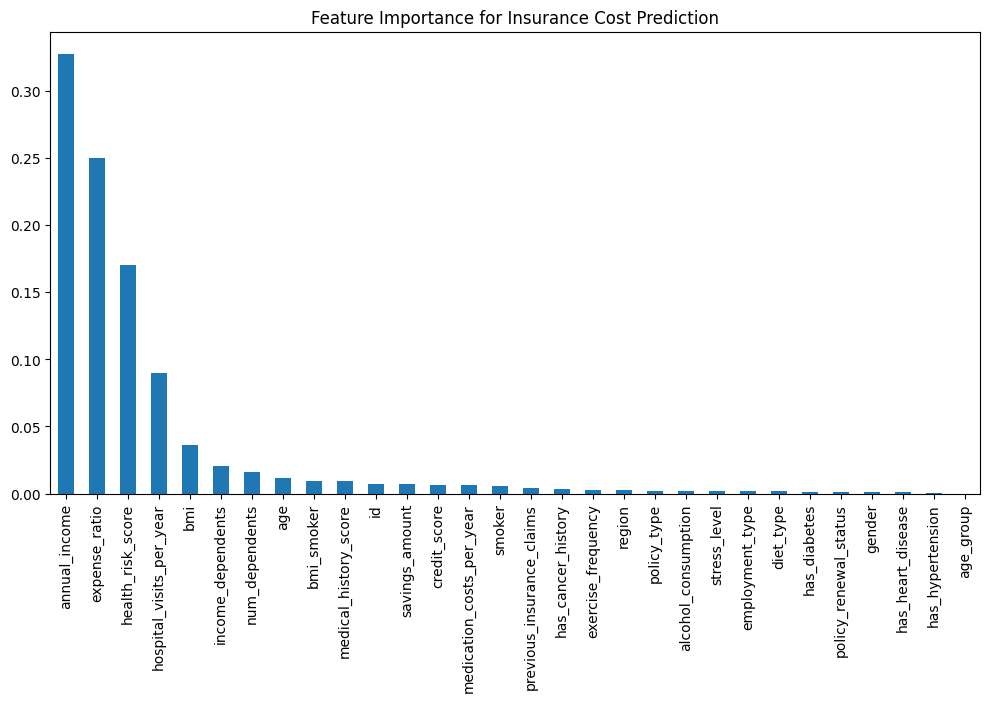

In [24]:
import matplotlib.pyplot as plt

# Get feature importance from Random Forest
feature_importance = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance for Insurance Cost Prediction")
plt.show()
